# Computing on Compressed Data in Neural Networks: A Simple Guide

Hey there! This notebook is like a fun adventure into the world of AI models (think of them as super-smart computer brains). We'll explain everything in easy steps, like telling a story to a high school friend. We'll cover:

- Background: What are neural networks, compression, and why we need it.
- The Challenge: Why it's tricky to do math (computations) directly on squished (compressed) data.
- What You Need to Do: Step-by-step guide to perform computations without fully unzipping the data.
- Future Steps: Cool ideas for making this better in the future.

We'll add pictures (visualizations) to make it clearer, like drawings in a comic book. Let's start!

## Background: What's This All About?

Imagine a neural network as a huge puzzle made of numbers (called weights) that helps AI do things like recognize pictures or chat like a human. These puzzles can be gigantic—like billions of pieces!  That's a problem because they take up tons of space on computers (memory) and need a lot of power to run.

Compression is like zipping a big file on your computer: it squishes the puzzle to make it smaller and easier to store or send. For AI, we use tricks like:
- Pruning: Cutting out unimportant puzzle pieces (weights that don't change much).
- Quantization: Rounding big numbers to smaller ones (like using 8 bits instead of 32).
- XOR + Zstd (from our demo): Spot differences between a basic puzzle and a tweaked one, then zip those differences.

Why do this? To run AI on phones or share custom versions (finetuned models) without wasting space.  But here's the twist: Normally, you have to unzip everything before using it, which is slow and uses extra memory.

## The Challenge: Why Can't We Just Compute on the Squished Stuff?

The big problem is doing math (like adding or multiplying numbers in the AI) without fully unzipping. It's like trying to edit a zipped photo without opening it—tricky!

- Memory Issue: Unzipping doubles the space needed (original + unzipped).
- Speed Issue: Unzipping takes time, especially for huge AI models.
- Sparsity: Many compressed parts are mostly zeros (empty space), but computers aren't great at skipping them without help.

This comes from how computers work: They like neat rows of numbers, but compressed data is messy and jumbled.  In multi-tenant serving (serving many users' custom AIs), this can make things super slow or crash from no memory left. 

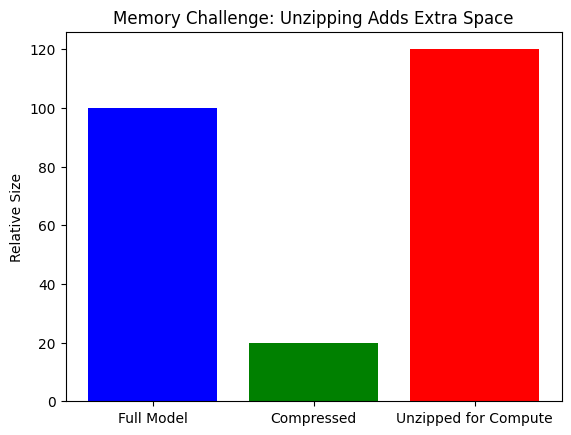

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Viz 1: Simple bar chart showing memory before/after compression
labels = ['Full Model', 'Compressed', 'Unzipped for Compute']
sizes = [100, 20, 120]  # Example percentages
plt.bar(labels, sizes, color=['blue', 'green', 'red'])
plt.title('Memory Challenge: Unzipping Adds Extra Space')
plt.ylabel('Relative Size')
plt.show()

## What You Need to Do: Steps to Compute on Compressed Data

To fix this, we want to do math right on the compressed puzzle without fully opening it. Here's how, step by step:

1. Understand Your Compression: For XOR + Zstd, the data is differences (deltas) zipped up. XOR makes mostly zeros where nothing changed.

2. Partial Unzip: Don't unzip everything—only small chunks (tiles) as needed. Like reading one page of a zipped book.

3. Apply Changes On-the-Fly: For each chunk, fix the differences (XOR apply) in a tiny buffer, do the math (e.g., multiply matrices), then throw away the buffer.

4. Use Sparsity if Possible: If mostly zeros, turn into a 'sparse' list (only save non-zeros with positions) and use special fast math for that.

5. Fuse Operations: Combine unzip + fix + math into one quick step using code tricks (kernels).

This way, you save memory and time!  

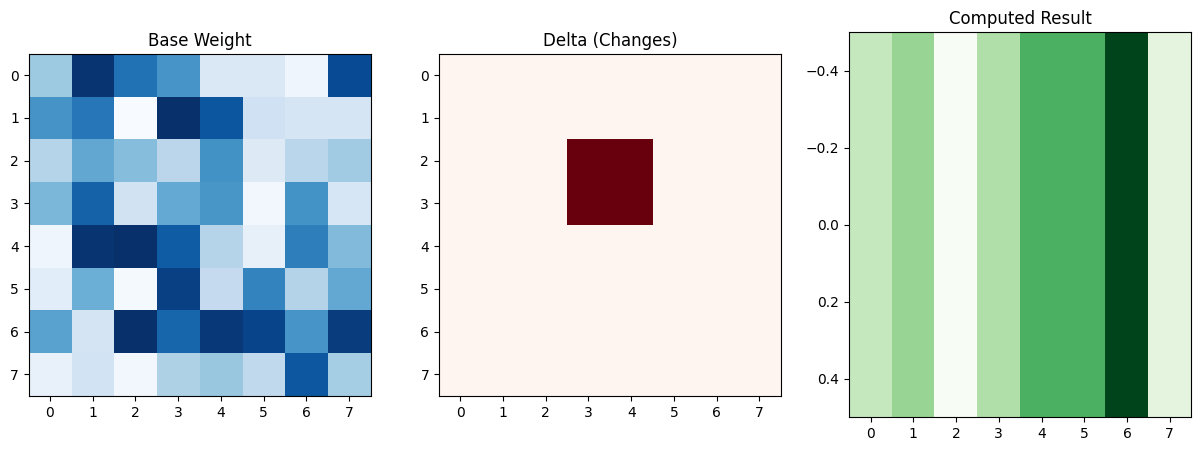

See how we only fixed small tiles?


In [6]:
# Example code: Simple tiled computation demo
# Imagine a small matrix (weight) and its compressed delta
base_weight = np.random.rand(8, 8)  # Basic puzzle piece
delta = np.zeros_like(base_weight)
delta[2:4, 3:5] = 0.1  # Small change
input_data = np.random.rand(1, 8)  # Input to multiply

# 'Compress' delta (simplified, not real Zstd)
compressed_delta = delta.flatten()  # Pretend compressed

# Step-by-step tiled compute
tile_size = 4
result = np.zeros((1, 8))
for i in range(0, 8, tile_size):
    # 'Unzip' tile (here, just slice)
    tile_delta = compressed_delta[i*8 : (i+tile_size)*8].reshape(tile_size, 8)
    tile_base = base_weight[i:i+tile_size, :]
    tile_fixed = tile_base + tile_delta  # 'Apply' delta
    tile_result = input_data @ tile_fixed.T  # Math (multiply)
    result[:, i:i+tile_size] = tile_result

# Viz 2: Heatmaps of base, delta, and tiled result
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(base_weight, cmap='Blues')
axs[0].set_title('Base Weight')
axs[1].imshow(delta, cmap='Reds')
axs[1].set_title('Delta (Changes)')
axs[2].imshow(result, cmap='Greens', aspect='auto')
axs[2].set_title('Computed Result')
plt.show()

print('See how we only fixed small tiles?')

## Future Steps: Where Do We Go Next?

This is exciting research! Future ideas:

1. Better Compression Formats: Make zips that are easier to peek into without full unzip. 

2. Smarter Hardware: Chips (like GPUs) that love sparse or compressed math. 

3. AI-Helped Compression: Use AI to compress in ways that make computing easy. 

4. Test on Big Models: Try this on real huge AIs and measure speed/memory savings.

5. Combine Techniques: Mix pruning, quantization, and our XOR trick for super efficiency. 

By 2025 and beyond, this could make AI run on your watch! Keep experimenting.

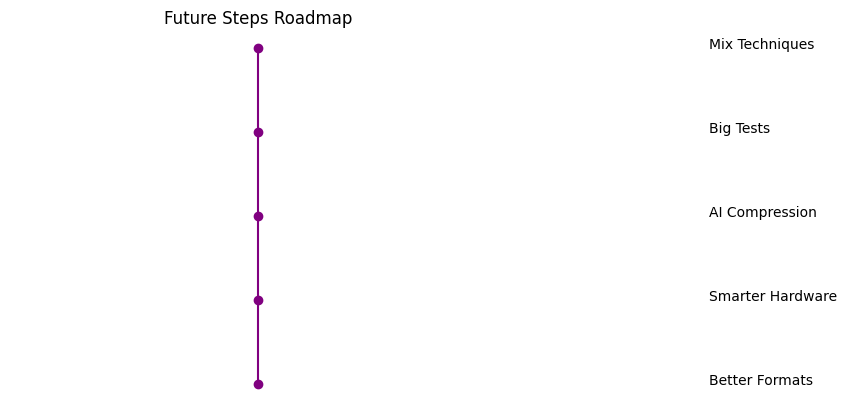

In [7]:
# Viz 3: Flowchart-like diagram for future steps (simple plot)
steps = ['Better Formats', 'Smarter Hardware', 'AI Compression', 'Big Tests', 'Mix Techniques']
y = range(len(steps))
plt.plot([0]*len(steps), y, 'o-', color='purple')
for i, step in enumerate(steps):
    plt.text(0.1, i, step)
plt.title('Future Steps Roadmap')
plt.axis('off')
plt.show()